# gradient descent and regression scratchpad

Here we code up gradient descent and apply it to the linear regression problem with some nice 2-d and 3-d datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 1. One-dimensional example

First lets compute the least ssquares cost function.

In [19]:
# compute cost value
def compute_cost_val(x,y,w):
    P = len(y)
    cost = 0
    
    # run over all data points and weights and compute total error
    for p in range(P):
        x_p = x[p]
        y_p = y[p]
        cost += (w[0] + np.dot(x_p,w[1:]) - y_p)**2
    return cost

Next, the gradient and gradient descent loop functions.

In [20]:
def compute_gradient(x,y,w):
    P = len(y)
    grad = 0
    for p in range(P):
        x_p = list(x[p])
        x_p.insert(0,1)
        x_p = np.array(x_p)
        x_p.shape = (len(x_p),1)
        y_p = y[p]
        temp = np.dot(x_p*x_p.T,w) - x_p*y_p
        grad+=2*temp
    return grad

In [21]:
# gradient descent loop
def grad_descent(x,y,alpha,K,w0):
    w = w0
    
    # create container to record weights
    whist = []
    
    # descent loop
    for k in range(K):
        # record current weight
        whist.append(w)
        
        # compute derivative
        grad = compute_gradient(x,y,w)
        
        # take descent step
        w = w - alpha*grad
        
    return whist

We can run this on a two-dimensional toy dataset.  Then we can plot the corresponding line.

First load the dataset.

In [22]:
data = np.asarray(pd.read_csv('~/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_1/datasets/regr_linear_data.csv'))
x = data[:,0]
x.shape = (len(x),1)
y = data[:,1]
y.shape = (len(y),1)

Now run gradient descent - be sure to debug this to make sure you get the best solution1

In [23]:
# inputs to gradient descent
w0 = 2*np.random.rand(2,1) - 1
alpha = 10**-3
K = 1000

# run gradient descent
whist = grad_descent(x,y,alpha,K,w0)

We can debug by plotting the cost history over the gradient descent steps.

In [24]:
# compute the associated ccst function values
ghist = []
for w in whist:
    g = compute_cost_val(x,y,w)
    ghist.append(g)
ghist = np.array(ghist)
ghist.shape = (len(ghist),1)
ghist# plt.plot(ghist)
# plt.xlabel('step')
# plt.ylabel('cost value')
# plt.show()

array([[ 15.98792137],
       [ 12.64352867],
       [ 10.03684119],
       [  8.00474318],
       [  6.42019026],
       [  5.18423254],
       [  4.21980177],
       [  3.46687242],
       [  2.87869284],
       [  2.41884988],
       [  2.05898258],
       [  1.77700155],
       [  1.55570205],
       [  1.38168379],
       [  1.24450963],
       [  1.13605029],
       [  1.04997402],
       [  0.98134905],
       [  0.92633404],
       [  0.88193691],
       [  0.84582706],
       [  0.8161891 ],
       [  0.79160888],
       [  0.7709848 ],
       [  0.75345866],
       [  0.73836188],
       [  0.72517353],
       [  0.71348769],
       [  0.70298804],
       [  0.69342802],
       [  0.68461542],
       [  0.67640036],
       [  0.66866593],
       [  0.66132091],
       [  0.65429406],
       [  0.64752976],
       [  0.64098449],
       [  0.63462421],
       [  0.62842225],
       [  0.62235766],
       [  0.61641397],
       [  0.61057821],
       [  0.6048401 ],
       [  0

Looks good!  Now lets plot the data with best fit line.

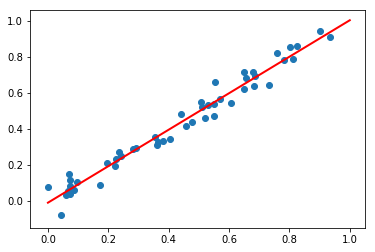

In [8]:
# now lets plot the points and line
plt.scatter(x,y)
s = np.linspace(0,1)
w = whist[-1]
t = w[0] + w[1]*s
plt.plot(s,t,c = 'r',linewidth = 2)
plt.show()

Nice!  

How do we make a prediction again?  Just feed in any input into our trained model!  Lets make a short function for doing this.

In [9]:
# a short function to perform predictions
def predict(w,x_input):
    output = w[0] + w[1]*x_input
    return output[0]

Lets test it out - and plot our prediction on our linear fit!

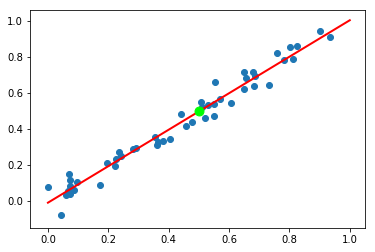

In [10]:
# a new input
x_input = 0.5
output = predict(w,x_input)

# now lets plot training points and line
plt.scatter(x,y)
s = np.linspace(0,1)
t = w[0] + w[1]*s
plt.plot(s,t,c = 'r',linewidth = 2)

# plot the new test point too!
plt.scatter(x_input,output,c = 'lime',s = 80,zorder = 3)
plt.show()

# 2.  Three-dimensional example.

In [25]:
data = np.loadtxt('/Users/outrageous/Workspace/Metis_MachineLearningCourse/chi17_ml1/level_2/datasets/3d_reg_data.csv')
x1 = data[:,0]
x1.shape = (len(x1),1)
x2 = data[:,1]
x2.shape = (len(x2),1)
x = np.concatenate((x1,x2),axis = 1)
y = data[:,2]

<IPython.core.display.Javascript object>


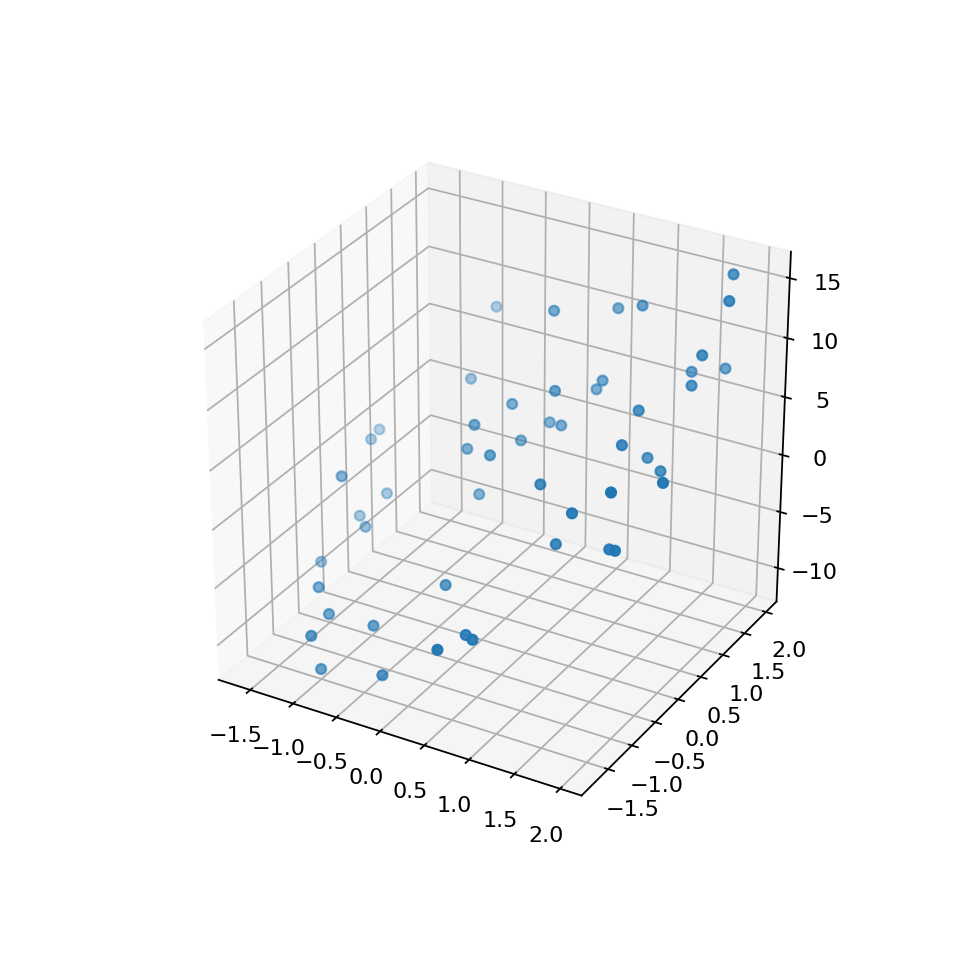

In [26]:
%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# define figure
fig = plt.figure(num=None, figsize=(6,6), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(111,projection='3d')
ax1.scatter(x1,x2,y)

We can use the exact functionality above - just make sure the initial weights have 3 dims instead of 2.

In [27]:
# inputs to gradient descent
w0 = 2*np.random.rand(3,1) - 1
alpha = 10**-3
K = 1000

# run gradient descent
whist = grad_descent(x,y,alpha,K,w0)

In [30]:
# compute the associated ccst function values
ghist = []
for w in whist:
    g = compute_cost_val(x,y,w)
    ghist.append(g)
# ghist = np.array(ghist)
# ghist.shape = (len(ghist),1)
plt.plot(ghist)
plt.xlabel('step')
plt.ylabel('cost value')
plt.show()

TypeError: plot() takes at least 3 arguments (2 given)

In [ ]:
%matplotlib nbagg

# make a 3d figure
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot(111,projection = '3d')

# create plotting range
r = np.linspace(-2,2,100)

# create grid from plotting range
xx,yy= np.meshgrid(r,r)
xx.shape = (len(r)**2,1)
yy.shape = (len(r)**2,1)

# produce plane
w = whist[-1]
t = w[0] + w[1]*xx + w[2]*yy


# plot cost surface
xx.shape = (len(r),len(r))
yy.shape = (len(r),len(r))
t.shape = (len(r),len(r))
ax.scatter(x1,x2,y)
ax.plot_surface(xx,yy,t,alpha = 0.1)
plt.show()